In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time
from PIL import Image
%matplotlib inline

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

In [3]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
train = ImageFolder('../Chapter3/dogsandcats/train/',simple_transform)
valid = ImageFolder('../Chapter3/dogsandcats/valid/',simple_transform)

In [4]:
train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,num_workers=3,shuffle=False)
img,label = next(iter(train_data_loader))

In [5]:
img = img[5]
img

tensor([[[ 0.3652,  0.3138,  0.2453,  ...,  1.5810,  1.5125,  1.4954],
         [ 0.3309,  0.2453,  0.2111,  ...,  1.5639,  1.4783,  1.4440],
         [ 0.2453,  0.2453,  0.2282,  ...,  1.5125,  1.4954,  1.4954],
         ...,
         [-1.7925, -1.7925, -1.7925,  ...,  1.1700,  1.2728,  1.2728],
         [-1.7754, -1.7240, -1.7240,  ...,  1.2043,  1.2728,  1.2557],
         [-1.7925, -1.7412, -1.7240,  ...,  1.2214,  1.2728,  1.2557]],

        [[ 0.1001,  0.0476, -0.0224,  ...,  0.8004,  0.8179,  0.8179],
         [ 0.0651, -0.0224, -0.0574,  ...,  0.8004,  0.7654,  0.7479],
         [-0.0224, -0.0224, -0.0399,  ...,  0.7304,  0.7829,  0.8004],
         ...,
         [-1.7381, -1.7381, -1.7381,  ...,  0.5378,  0.4853,  0.4678],
         [-1.7206, -1.6681, -1.6681,  ...,  0.5728,  0.5028,  0.4853],
         [-1.7381, -1.6856, -1.6681,  ...,  0.5903,  0.5028,  0.4853]],

        [[-0.5844, -0.6367, -0.7064,  ...,  1.4374,  1.3328,  1.3154],
         [-0.6193, -0.7064, -0.7413,  ...,  1

In [12]:
img.unsqueeze_(0)
img.size()

torch.Size([1, 3, 224, 224])

In [ ]:
def imshow(inp,cmap=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

In [ ]:
imshow(img[5])

In [6]:
vgg = models.vgg16(pretrained=True).cuda()

In [ ]:
img = img[5][None]
img

In [14]:
class LayerActivations():
    features=None
    
    def __init__(self,model,layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
    
    def hook_fn(self,module,input,output):
        self.features = output.cpu().data.numpy()
    
    def remove(self):
        self.hook.remove()
        

conv_out = LayerActivations(vgg.features,0)

o = vgg(Variable(img.cuda()))

conv_out.remove()

In [15]:
act = conv_out.features

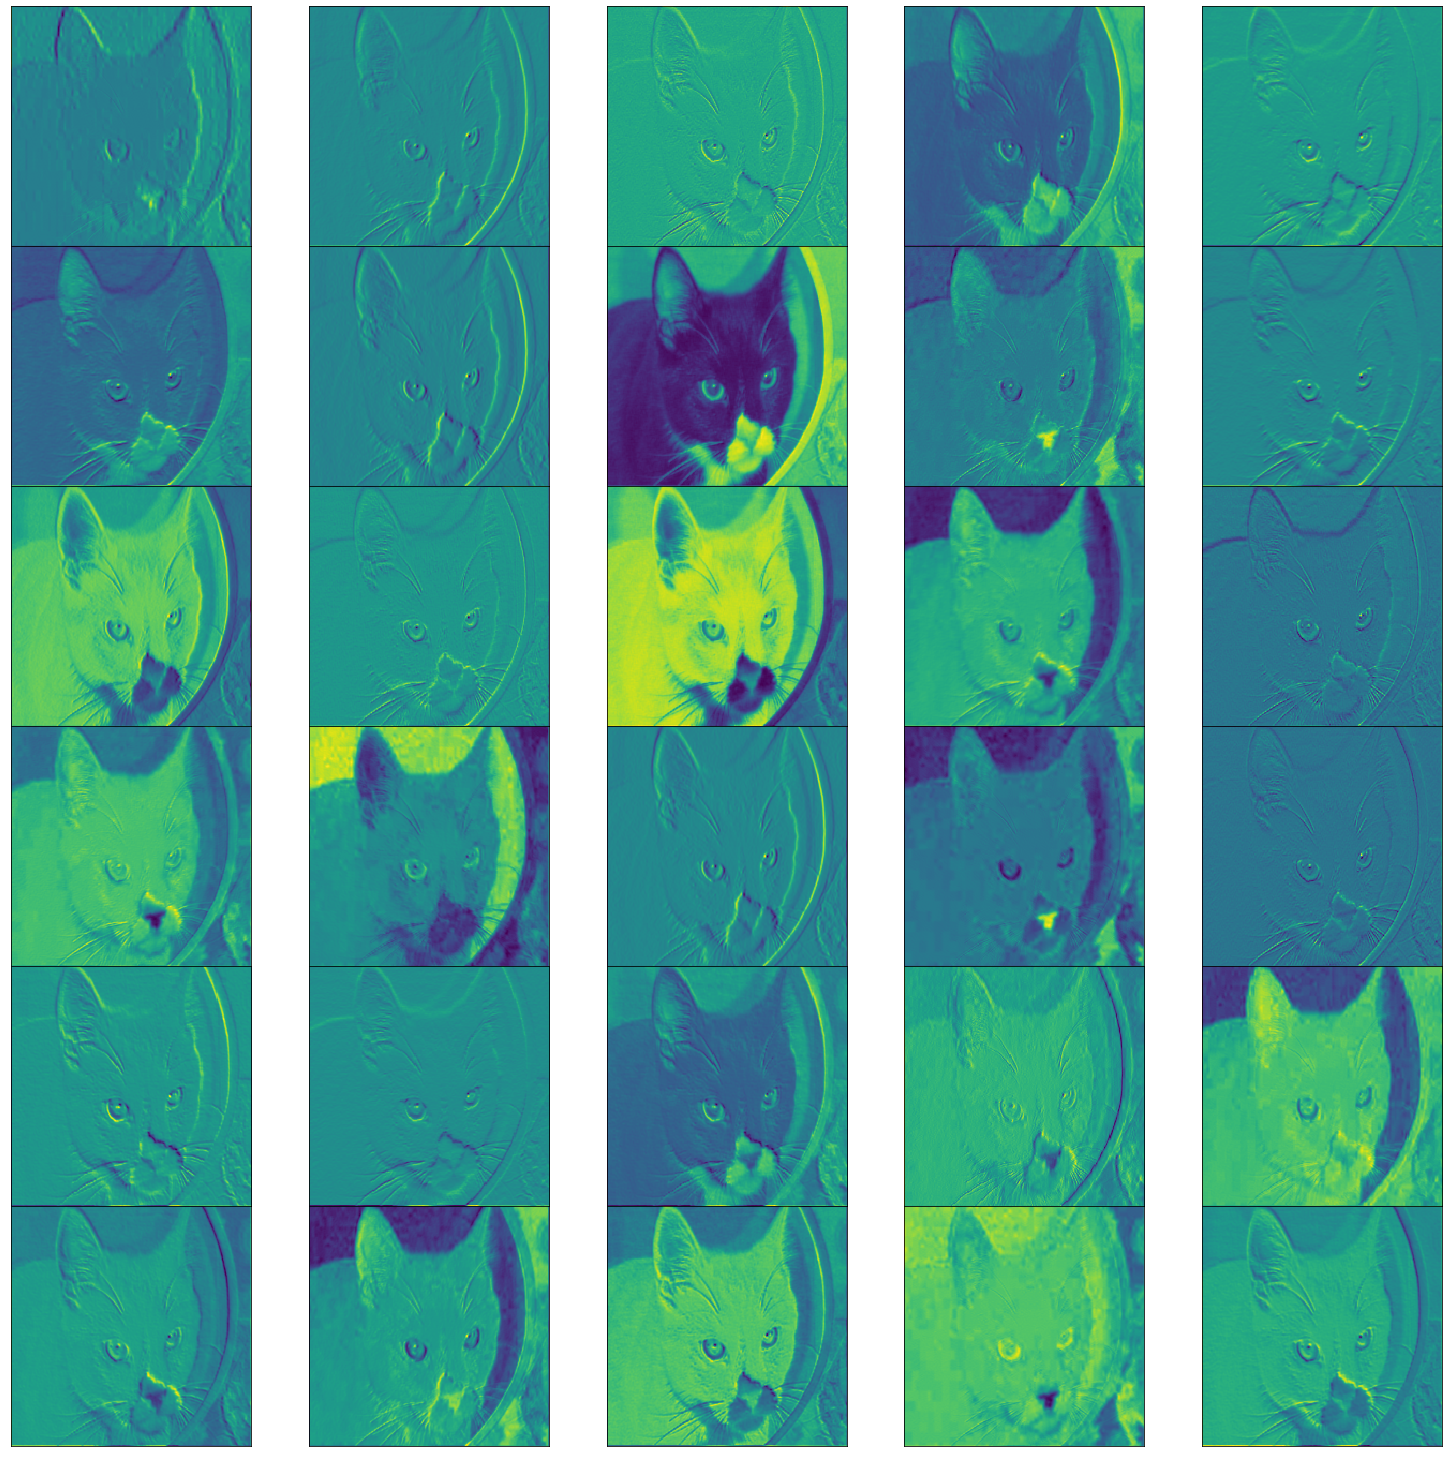

In [16]:
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
    ax.imshow(act[0][i])